## Feature Engineering Deep Dive チュートリアル

In [1]:
import h2o
import matplotlib as plt
%matplotlib inline
from h2o.automl import H2OAutoML

In [2]:
#> H2Oクラスターの開始
h2o.init(url='http://localhost:54321')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_261"; Java(TM) SE Runtime Environment (build 1.8.0_261-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from /home/ec2-user/anaconda3/envs/h2o_3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbvz8i_e0
  JVM stdout: /tmp/tmpbvz8i_e0/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmpbvz8i_e0/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_ec2_user_pemrvw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.399 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


### 1. データの読み込みと確認

In [3]:
#> データのロード
loans = h2o.import_file("https://sample-data-open.s3-ap-northeast-1.amazonaws.com/h2o_sample_loan/loan.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [39]:
loans.head(5)

loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
5000,36 months,10.65,10,RENT,24000,credit_card,AZ,27.65,0,83.7,9,0,26,verified
2500,60 months,15.27,0,RENT,30000,car,GA,1,0,9.4,4,1,12,verified
2400,36 months,15.96,10,RENT,12252,small_business,IL,8.72,0,98.5,10,0,10,not verified
10000,36 months,13.49,10,RENT,49200,other,CA,20,0,21,37,0,15,verified
5000,36 months,7.9,3,RENT,36000,wedding,AZ,11.2,0,28.3,12,0,7,verified


In [4]:
loans.describe()

Rows:163987
Cols:15




,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
type,int,enum,real,int,enum,real,enum,enum,real,int,real,int,int,int,enum
mins,500.0,,5.42,0.0,,1896.0,,,0.0,0.0,0.0,1.0,0.0,0.0,
mean,13074.169141456336,,13.715904065566168,5.684352932995333,,71915.67051974915,,,15.881530121290089,0.2273570060625282,54.07917280242262,24.57973383427463,0.1830388994249544,14.854273655448353,
maxs,35000.0,,26.06,10.0,,7141778.0,,,39.99,29.0,150.70000000000002,118.0,1.0,65.0,
sigma,7993.556188734652,,4.3919398705457935,3.610663731100237,,59070.91565491827,,,7.587668224192549,0.694167922928418,25.285366766770515,11.685190365910659,0.3866995896078875,6.947732922546697,
zeros,0,,0,14248,,0,,,270,139459,1562,0,133971,11,
missing,0,0,0,5804,0,4,0,0,0,29,193,29,0,29,0
0,5000.0,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0.0,26.0,verified
1,2500.0,60 months,15.27,0.0,RENT,30000.0,car,GA,1.0,0.0,9.4,4.0,1.0,12.0,verified
2,2400.0,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0.0,10.0,not verified


#### データに関して

[LendingClub](https://www.lendingclub.com/info/statistics.action)データに対しデータクレンジングと簡素化を実施したもの

|Id  | Column Name | Description | 説明 |
|:---|:----------------------|:-------------------|:-------------------|
|1   | loan_amnt             | Requested loan amount (US dollars)       | 申し込まれたローンの額(USD) |
|2   | term                  | Loan term length (months)       | 申し込まれたローン期間(月) |
|3   | int_rate              | Recommended interest rate       | 貸出金利 |
|4   | emp_length            | Employment length (years)       | 継続雇用期間(年) |
|5   | home_ownership        | Housing status       | 住居形態 |
|6   | annual_inc            | Annual income (US dollars)       | 年収(USD) |
|7   | purpose               | Purpose for the loan       | ローン借り入れ理由 |
|8   | addr_state            | State of residence       | 居住州 |
|9   | dti                   | Debt to income ratio       | 負債比率(%)（既存のローンの返済額を借り手の月収で割った率） |
|10  | delinq_2yrs           | Number of delinquencies in the past 2 years       | 過去2年における滞納回数 |
|11  | revol_util            | Percent of revolving credit line utilized       | リボルビングクレジット利用率(%) |
|12  | total_acc             | Number of active accounts       | アクティブなアカウント数 |
|13  | bad_loan              | Bad loan indicator       | 不良貸し付け |
|14  | longest_credit_length | Age of oldest active account       | 最長のアクティブなアカウント(年) |
|15  | verification_status   | Income verification status       | 所得確認状況 |

参考：[Lending Club Loan Analysis](Lending Club Loan Analysis) on Kaggle Notebook

`bad_loan`をターゲットとしてモデル作成

In [15]:
#> int型をカテゴリ型(enum)へ変更
loans['bad_loan'] = loans['bad_loan'].asfactor()

In [16]:
loans['bad_loan'].describe()

Rows:163987
Cols:1




,bad_loan
type,enum
mins,
mean,
maxs,
sigma,
zeros,
missing,0
0,0
1,1
2,0


In [17]:
#> 水準数の確認（1:不良貸し付け）
loans['bad_loan'].table()

bad_loan,Count
0,133971
1,30016


In [18]:
#> 学習/テストデータセットへの分割（学習 :  テスト = 80% : 20% ）
train, test = loans.split_frame([0.8], seed=12345)
print(">> train/testのデータ数")
print("train:%d test:%d" % (train.nrows, test.nrows))

>> train/testのデータ数
train:131248 test:32739


### 2. ベースラインモデルの作成

In [19]:
response = "bad_loan"   # ターゲット変数

predictors = train.col_names
predictors.remove(response)
predictors.remove("int_rate")
predictors   # 特徴量(13)

['loan_amnt',
 'term',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'revol_util',
 'total_acc',
 'longest_credit_length',
 'verification_status']

In [20]:
aml = H2OAutoML(max_models = 6,
                max_runtime_secs_per_model = 60,
                exclude_algos = ['DRF', 'DeepLearning', 'StackedEnsemble'],
                seed = 12345)

%time aml.train(x = predictors, y = response, training_frame = train)

AutoML progress: |████████
14:40:39.955: GLM_1_AutoML_20201007_143831 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: 82

████████████████████████████████████████████████| 100%
CPU times: user 7.26 s, sys: 142 ms, total: 7.4 s
Wall time: 3min 38s


- max_models（作成する最大モデル数）かmax_runtime_secs（最大実行時間数）の設定に達すると、探索が終了（[ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-stopping-parameters)）
- [exclude_algos](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/exclude_algos.html)にしたアルゴリズムはAutoMLで試行されない

In [21]:
#> k分割交差検証法の分割数(k)
aml.nfolds

5

In [22]:
#> k分割交差検証法による結果。AUC順
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20201007_143831,0.681176,0.443732,0.319553,0.36962,0.373555,0.139544
XGBoost_3_AutoML_20201007_143831,0.679816,0.444138,0.318098,0.370936,0.373766,0.139701
GBM_2_AutoML_20201007_143831,0.679021,0.444618,0.315893,0.371141,0.374013,0.139886
GBM_3_AutoML_20201007_143831,0.676137,0.445671,0.313651,0.372875,0.374456,0.140217
XGBoost_1_AutoML_20201007_143831,0.660832,0.45526,0.297487,0.384246,0.378586,0.143327
XGBoost_2_AutoML_20201007_143831,0.64458,0.469616,0.282045,0.396293,0.383979,0.14744


並び順に関しての[ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/sort_metric.html)

In [24]:
#> leaderboardの一番上のモデル
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20201007_143831


Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,52.0,52.0,47960.0,6.0,6.0,6.0,32.0,64.0,58.923077




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1330293974524767
RMSE: 0.3647319528811216
LogLoss: 0.4254314489578683
Mean Per-Class Error: 0.33645415118293
AUC: 0.7257812953735341
AUCPR: 0.40112712250300603
Gini: 0.45156259074706817

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21000410129532213: 


,0,1,Error,Rate
0,80870.0,26438.0,0.2464,(26438.0/107308.0)
1,10368.0,13572.0,0.4331,(10368.0/23940.0)
Total,91238.0,40010.0,0.2804,(36806.0/131248.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.2100041,0.4244566,221.0
max f2,0.1239757,0.5699234,313.0
max f0point5,0.3096586,0.4145283,142.0
max accuracy,0.4164777,0.8253916,82.0
max precision,0.8566133,1.0,0.0
max recall,0.0358396,1.0,398.0
max specificity,0.8566133,1.0,0.0
max absolute_mcc,0.2490722,0.2717082,188.0
max min_per_class_accuracy,0.1832630,0.6619078,247.0
max mean_per_class_accuracy,0.1852377,0.6635458,245.0



Gains/Lift Table: Avg response rate: 18.24 %, avg score: 18.26 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100040,0.5092039,4.0961215,4.0961215,0.7471439,0.5721627,0.7471439,0.5721627,0.0409774,0.0409774,309.6121492,309.6121492,0.0378835
2,0.0200003,0.4578522,3.3178383,3.7071281,0.6051829,0.4804470,0.6761905,0.5263223,0.0331662,0.0741437,231.7838295,270.7128138,0.0662226
3,0.0300043,0.4271326,2.9186431,3.4442331,0.5323686,0.4416545,0.6282377,0.4980925,0.0291980,0.1033417,191.8643143,244.4233064,0.0896987
4,0.0400006,0.4033869,2.7035786,3.2591400,0.4931402,0.4146168,0.5944762,0.4772316,0.0270259,0.1303676,170.3578560,225.9139977,0.1105275
5,0.0500046,0.3835079,2.5345013,3.1141681,0.4623001,0.3931535,0.5680329,0.4604108,0.0253551,0.1557226,153.4501270,211.4168070,0.1293034
6,0.1000015,0.3205608,2.1622036,2.6382221,0.3943920,0.3487733,0.4812190,0.4045963,0.1081036,0.2638262,116.2203640,163.8222120,0.2003734
7,0.1500061,0.2803867,1.7617437,2.3460478,0.3213469,0.2994641,0.4279256,0.3695505,0.0880952,0.3519215,76.1743686,134.6047803,0.2469619
8,0.2000030,0.2514243,1.5472956,2.1463750,0.2822310,0.2653155,0.3915048,0.3434937,0.0773601,0.4292815,54.7295649,114.6374979,0.2804296
9,0.3000046,0.2110529,1.3157694,1.8695065,0.24,0.2299880,0.3410032,0.3056585,0.1315789,0.5608605,31.5769424,86.9506460,0.3190519
10,0.3999985,0.1818778,1.0568731,1.6663597,0.1927766,0.1957366,0.3039486,0.2781796,0.1056809,0.6665414,5.6873108,66.6359732,0.3260076




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.13954355878848432
RMSE: 0.37355529548981675
LogLoss: 0.44373204240160347
Mean Per-Class Error: 0.36793432447933117
AUC: 0.6811763163001875
AUCPR: 0.3195529756610926
Gini: 0.362352632600375

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19121624842192197: 


,0,1,Error,Rate
0,72998.0,34310.0,0.3197,(34310.0/107308.0)
1,10043.0,13897.0,0.4195,(10043.0/23940.0)
Total,83041.0,48207.0,0.3379,(44353.0/131248.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.1912162,0.3852412,235.0
max f2,0.1131158,0.5515376,321.0
max f0point5,0.2758782,0.3465267,160.0
max accuracy,0.5366276,0.8179706,33.0
max precision,0.8342134,1.0,0.0
max recall,0.0347670,1.0,397.0
max specificity,0.8342134,1.0,0.0
max absolute_mcc,0.1983775,0.2092068,228.0
max min_per_class_accuracy,0.1783891,0.6296157,247.0
max mean_per_class_accuracy,0.1700652,0.6320657,255.0



Gains/Lift Table: Avg response rate: 18.24 %, avg score: 18.22 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100040,0.5047398,2.7558004,2.7558004,0.5026657,0.5639131,0.5026657,0.5639131,0.0275689,0.0275689,175.5800392,175.5800392,0.0214836
2,0.0200003,0.4549204,2.5698622,2.6628667,0.46875,0.4775314,0.4857143,0.5207387,0.0256892,0.0532581,156.9862155,166.2866691,0.0406775
3,0.0300043,0.4240992,2.3090267,2.5448901,0.4211729,0.4384259,0.4641950,0.4932941,0.0230994,0.0763576,130.9026692,154.4890073,0.0566945
4,0.0400006,0.4007365,2.2021420,2.4592357,0.4016768,0.4120392,0.4485714,0.4729881,0.0220134,0.0983709,120.2142042,145.9235708,0.0713925
5,0.0500046,0.3816685,2.1253067,2.3924295,0.3876618,0.3911736,0.4363858,0.4566202,0.0212615,0.1196324,112.5306666,139.2429548,0.0851615
6,0.1000015,0.3190522,1.9057135,2.1490901,0.3476074,0.3469996,0.392,0.4018141,0.0952799,0.2149123,90.5713486,114.9090058,0.1405469
7,0.1500061,0.2794237,1.6222410,1.9734648,0.2959013,0.2979683,0.3599655,0.3671971,0.0811195,0.2960317,62.2240985,97.3464781,0.1786034
8,0.2000030,0.2511976,1.4946609,1.8537729,0.2726303,0.2647849,0.3381333,0.3415960,0.0747285,0.3707602,49.4660862,85.3772921,0.2088525
9,0.3000046,0.2111329,1.2948842,1.6674767,0.2361905,0.2300582,0.3041524,0.3044167,0.1294904,0.5002506,29.4884195,66.7476679,0.2449202
10,0.3999985,0.1818785,1.1316479,1.5335271,0.2064157,0.1959704,0.2797196,0.2773067,0.1131579,0.6134085,13.1647925,53.3527145,0.2610210




Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.6485354,0.0150719,0.6656,0.6484953,0.6501333,0.6540821,0.6243666
auc,0.6811718,0.0023383,0.6798872,0.6793366,0.6849583,0.6797680,0.6819087
aucpr,0.3199379,0.0044544,0.3156268,0.317051,0.3259265,0.3233579,0.3177272
err,0.3514645,0.0150719,0.3344,0.3515048,0.3498667,0.3459179,0.3756334
err_count,9225.8,395.5189,8778.0,9227.0,9184.0,9080.0,9860.0
---,---,---,---,---,---,---,---
precision,0.2837105,0.0040827,0.2852016,0.2816846,0.2866031,0.2874912,0.2775716
r2,0.0642686,0.0020600,0.0624600,0.0629908,0.0676980,0.0644518,0.0637423
recall,0.606909,0.0288414,0.5739167,0.6030614,0.6149353,0.591782,0.6508496
rmse,0.3735529,0.0014947,0.3714726,0.373236,0.3730546,0.3751849,0.3748165



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2020-10-07 14:41:05,25.648 sec,0.0,0.3861761,0.4750174,0.5,0.1824028,1.0,0.8175972
,2020-10-07 14:41:05,26.025 sec,5.0,0.3785056,0.4564383,0.6866769,0.3411273,3.2627210,0.3189534
,2020-10-07 14:41:06,26.377 sec,10.0,0.3742270,0.4467487,0.6948040,0.3547033,3.5574878,0.3185344
,2020-10-07 14:41:06,26.750 sec,15.0,0.3717760,0.4412110,0.7005711,0.3627172,3.6368214,0.3177801
,2020-10-07 14:41:07,27.103 sec,20.0,0.3701288,0.4375187,0.7040753,0.3691151,3.7871378,0.3055666
,2020-10-07 14:41:07,27.463 sec,25.0,0.3688691,0.4346851,0.7087730,0.3759170,3.8581205,0.3088809
,2020-10-07 14:41:07,27.810 sec,30.0,0.3679740,0.4326188,0.7122926,0.3808808,3.8664715,0.3139629
,2020-10-07 14:41:08,28.171 sec,35.0,0.3671138,0.4306303,0.7158741,0.3853588,3.8831733,0.3057418
,2020-10-07 14:41:08,28.520 sec,40.0,0.3662989,0.4288288,0.7193870,0.3905944,3.9917351,0.2915168
,2020-10-07 14:41:08,28.871 sec,45.0,0.3655489,0.4271770,0.7228177,0.3957483,4.0501915,0.2823129



Variable Importances: 


variable,relative_importance,scaled_importance,percentage
term,1979.0814209,1.0,0.2003804
addr_state,1958.3901367,0.9895450,0.1982854
annual_inc,1266.5762939,0.6399819,0.1282398
revol_util,1105.2965088,0.5584897,0.1119104
dti,896.0816650,0.4527766,0.0907275
purpose,860.9823608,0.4350414,0.0871738
loan_amnt,645.6926880,0.3262588,0.0653759
longest_credit_length,256.8340759,0.1297744,0.0260042
total_acc,235.7104187,0.1191009,0.0238655
emp_length,232.2639008,0.1173594,0.0235165


In [27]:
#> テストデータに対する結果の取得
perf = aml.leader.model_performance(test_data=test)
perf


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14128182734644792
RMSE: 0.37587474954623906
LogLoss: 0.4478148716073599
Mean Per-Class Error: 0.364585167902983
AUC: 0.6834644287536212
AUCPR: 0.3227999011453459
Gini: 0.36692885750724247

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19705499862227122: 


,0,1,Error,Rate
0,18841.0,7822.0,0.2934,(7822.0/26663.0)
1,2662.0,3414.0,0.4381,(2662.0/6076.0)
Total,21503.0,11236.0,0.3202,(10484.0/32739.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.1970550,0.3944085,222.0
max f2,0.1060075,0.5556896,328.0
max f0point5,0.2530640,0.3548226,172.0
max accuracy,0.5096827,0.8149302,36.0
max precision,0.8220818,1.0,0.0
max recall,0.0380764,1.0,395.0
max specificity,0.8220818,1.0,0.0
max absolute_mcc,0.2113265,0.2224247,208.0
max min_per_class_accuracy,0.1773936,0.6335746,243.0
max mean_per_class_accuracy,0.1881280,0.6354148,231.0



Gains/Lift Table: Avg response rate: 18.56 %, avg score: 18.16 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100186,0.5005880,2.7434072,2.7434072,0.5091463,0.5560997,0.5091463,0.5560997,0.0274852,0.0274852,174.3407188,174.3407188,0.0214469
2,0.0200067,0.4485094,2.1091616,2.4267686,0.3914373,0.4712177,0.4503817,0.5137235,0.0210665,0.0485517,110.9161629,142.6768565,0.0350498
3,0.0300254,0.4204323,2.1191588,2.3241277,0.3932927,0.4340823,0.4313327,0.4871494,0.0212311,0.0697828,111.9158846,132.4127682,0.0488174
4,0.0400134,0.3968457,2.4387181,2.3527316,0.4525994,0.4079851,0.4366412,0.4673885,0.0243581,0.0941409,143.8718133,135.2731558,0.0664621
5,0.0500015,0.3793229,1.9773390,2.2777448,0.3669725,0.3876737,0.4227245,0.4514651,0.0197498,0.1138907,97.7339027,127.7744779,0.0784483
6,0.1000031,0.3207363,1.9255501,2.1016475,0.3573610,0.3468149,0.3900428,0.3991400,0.0962804,0.2101712,92.5550138,110.1647458,0.1352734
7,0.1500046,0.2790328,1.7543901,1.9858950,0.3255956,0.2986363,0.3685604,0.3656387,0.0877222,0.2978934,75.4390126,98.5895014,0.1815899
8,0.2000061,0.2511912,1.5799386,1.8844059,0.2932193,0.2646593,0.3497251,0.3403939,0.0789993,0.3768927,57.9938575,88.4405904,0.2171957
9,0.3000092,0.2106997,1.3610513,1.7099544,0.2525962,0.2297976,0.3173488,0.3035284,0.1361093,0.5130020,36.1051251,70.9954353,0.2615299
10,0.4000122,0.1807219,1.0664585,1.5490804,0.1979230,0.1950037,0.2874924,0.2763973,0.1066491,0.6196511,6.6458538,54.9080400,0.2696905


**各データセット、検証におけるAUCの比較**

In [29]:
print("AUC: train = {:.4f}, X-val = {:.4f}, test = {:.4f}".format(aml.leader.auc(train = True),
                                                                  aml.leader.auc(xval = True), 
                                                                  perf.auc()))

AUC: train = 0.7258, X-val = 0.6812, test = 0.6835


**変数重要度の確認**

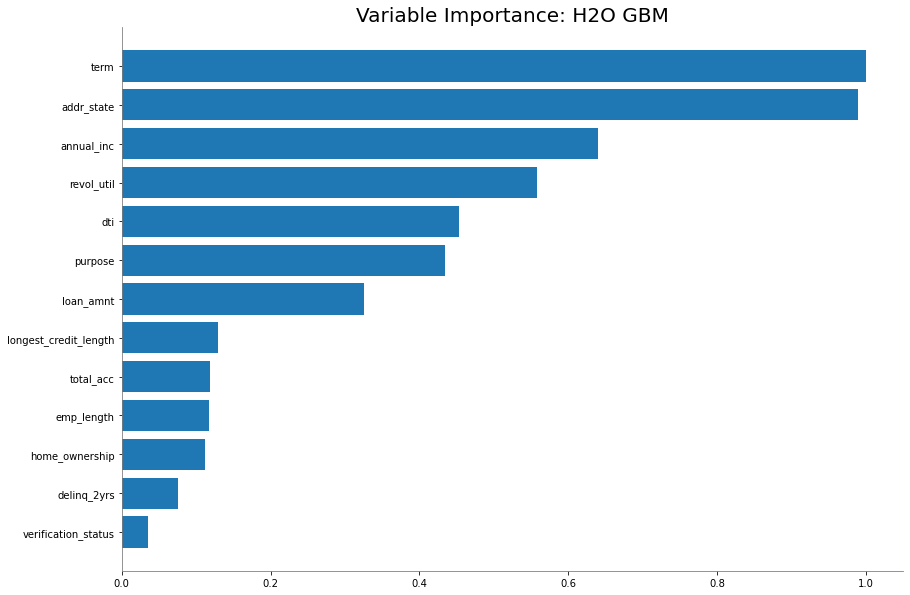

In [37]:
aml.leader.varimp_plot(13)

上位に入るaddr_stateは50水準のカテゴリカル変数

In [47]:
#> 水準数の確認
loans['addr_state'].table().dim[0]

50

### 3. Feature Engineeringとそれを利用したモデルの作成

練習として、以下5つのFeature Engineeringをそれぞれの変数に実施する
1. **Algebraic Transformations**
    - Ratio of Annual Income(annual_inc) to Number of Credit Lines(?)
<br><br>
2. **Target Encoding**
    - 居住数(addr_state)
    - ローン借り入れ理由(purpose)
<br><br>
3. **Combining Categories**
    - 住所形態(home_ownership)
<br><br>
4. **Indicator Functions**
    - 申し込まれたローン期間(月)(term)
    - 所得確認状況(verification_status)
    - 継続雇用期間(年)(emp_length) - 欠損を示すIndicator
<br><br>
5. **Separating Typical from Extreme**
    - 申し込まれたローンの額(USD)(loan_amnt)
    - リボルビングクレジット利用率(%)(revol_util)
    - 過去2年における滞納回数(delinq_2yrs)
    - 年収(USD)(annual_inc)
    - 負債比率(%)(dti)
    - Number of Credit Lines(?)
    - Longest Credit Length(?)